In [1]:
from model import EfficientDetModel
import torch
import pandas as pd
from data_utils import CarsDatasetAdaptor, EfficientDetDataModule
from pathlib import Path
from plot_functions import compare_bboxes_for_image


/home/holden/miniconda3/envs/ptorch-lightning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = Path('../data-gen/output')
df = pd.read_csv(dataset_path/'annotations.csv')
train_data_path = dataset_path/'train'
cars_train_ds = CarsDatasetAdaptor(train_data_path, df)

{'name': 'tf_efficientnetv2_b0', 'backbone_name': 'tf_efficientnetv2_b0', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 13, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_after_downsample': False, 'conv_bn_relu_pattern': False, 'use_native_resize_op': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 

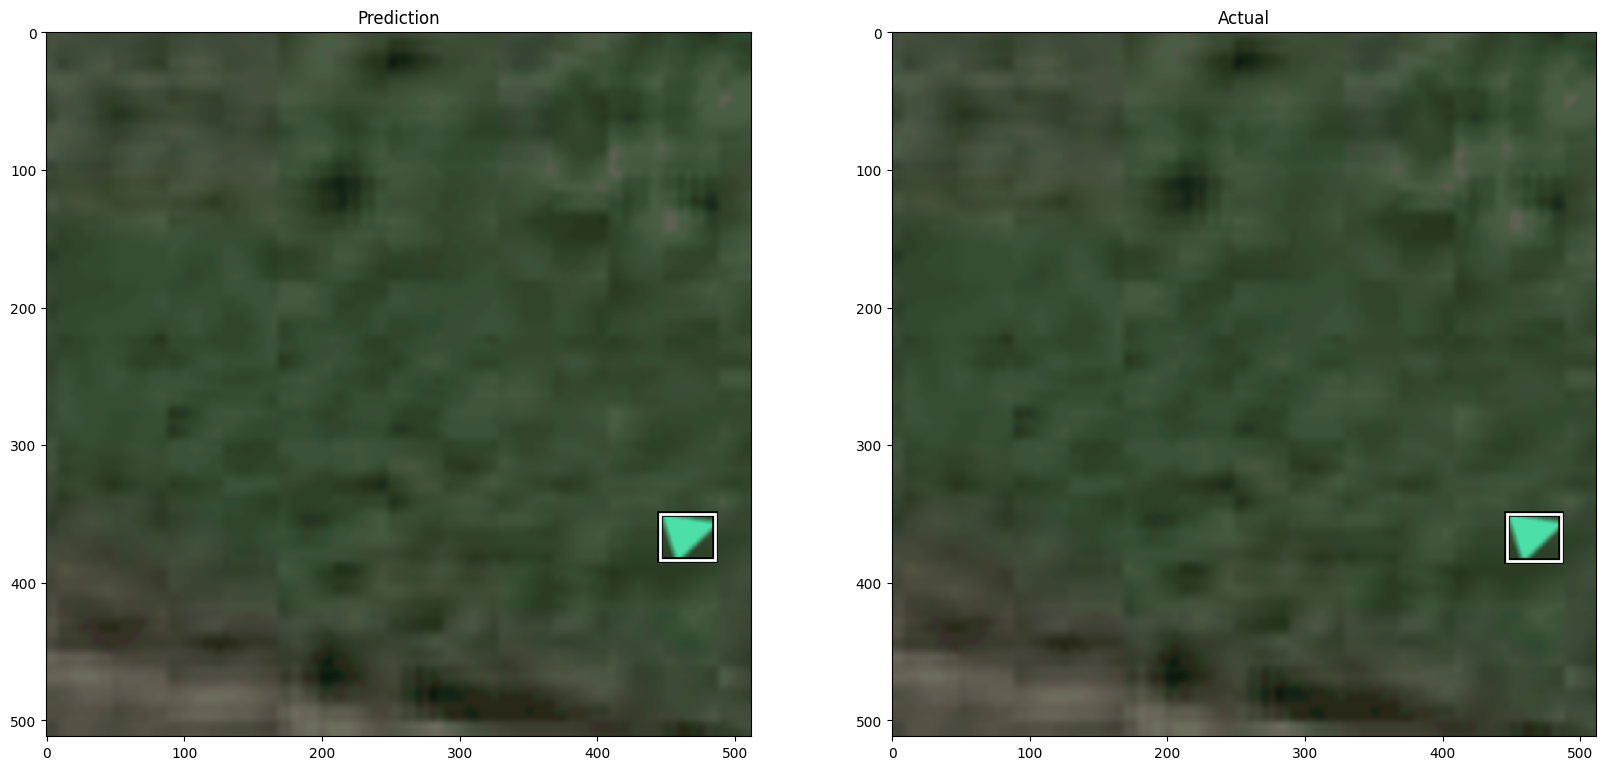

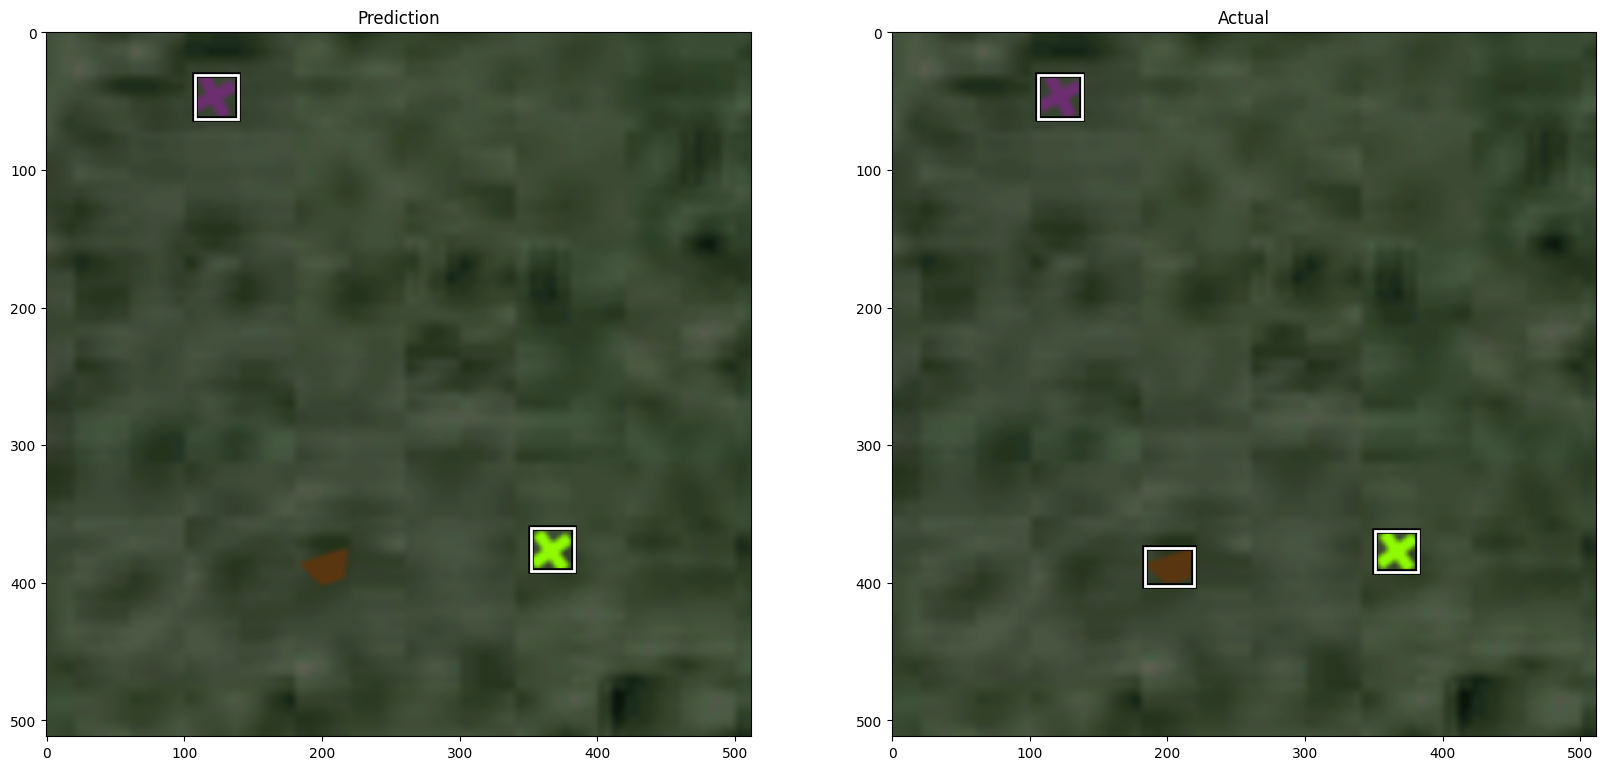

In [3]:
model = EfficientDetModel(
    num_classes=13,
    img_size=512,
    model_architecture="tf_efficientnetv2_b0"
    )

model.load_state_dict(torch.load('trained_effdet_custom'))
model.eval()
image1, truth_bboxes1, _, _ = cars_train_ds.get_image_and_labels_by_idx(0)
image2, truth_bboxes2, _, _ = cars_train_ds.get_image_and_labels_by_idx(1)
images = [image1, image2]
predicted_bboxes, predicted_class_confidences, predicted_class_labels = model.predict(images)
compare_bboxes_for_image(image1, predicted_bboxes=predicted_bboxes[0], actual_bboxes=truth_bboxes1.tolist())
compare_bboxes_for_image(image2, predicted_bboxes=predicted_bboxes[1], actual_bboxes=truth_bboxes2.tolist())